<a href="https://colab.research.google.com/github/NeelPatil/ML-Projects/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import missingno as mn
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#importing data
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
data = pd.read_csv('winequality-red.csv')

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Checking for missing values in the data 
data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

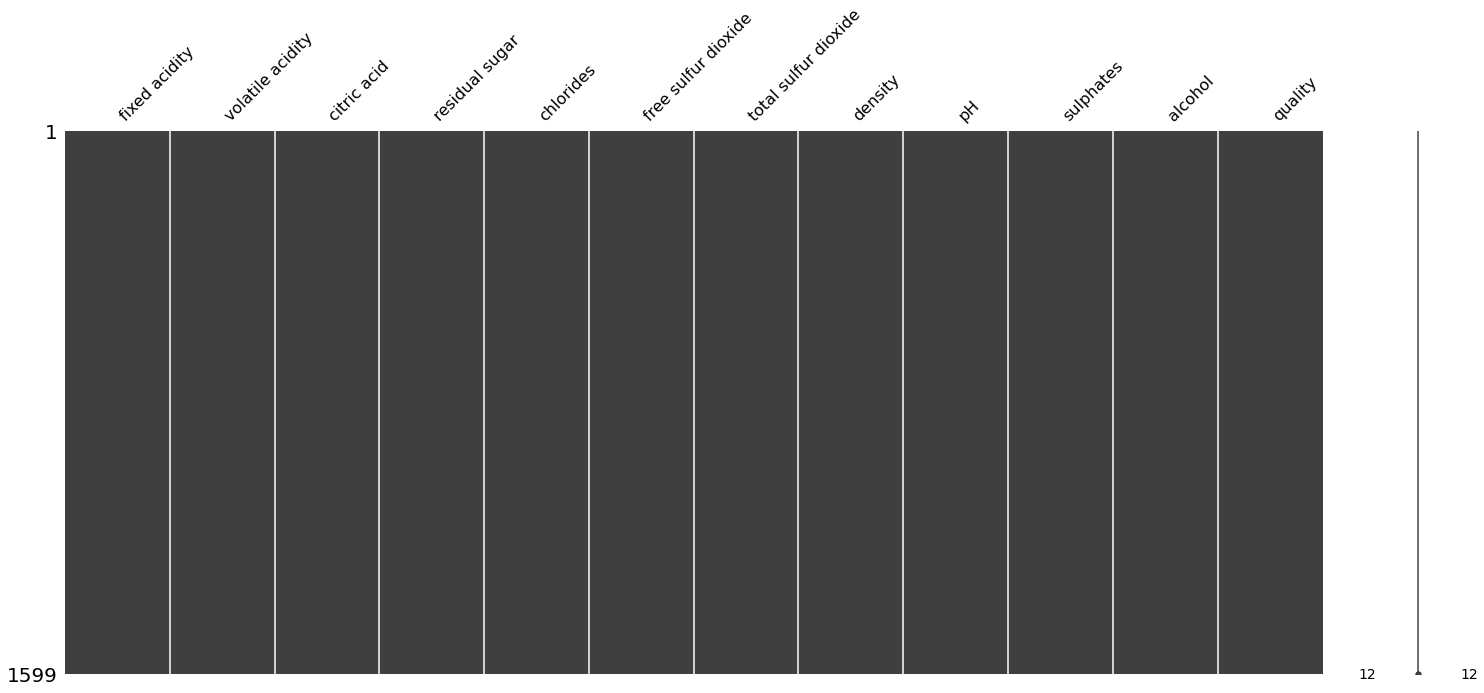

In [ ]:
# using msno matrix to check for missing values

mn.matrix(data)

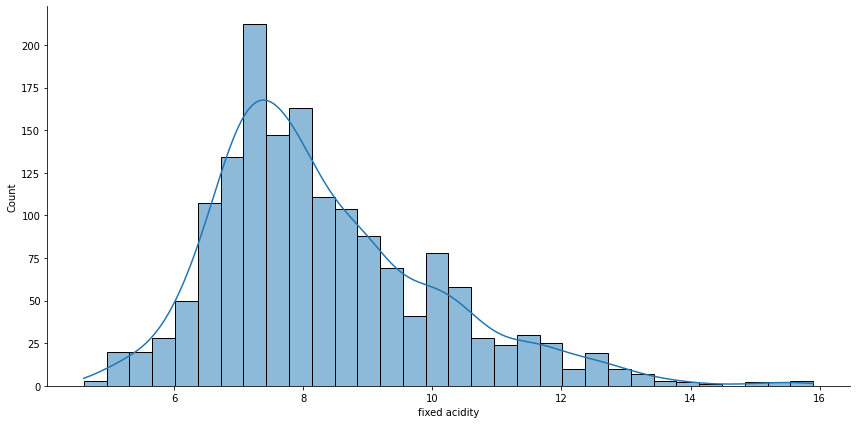

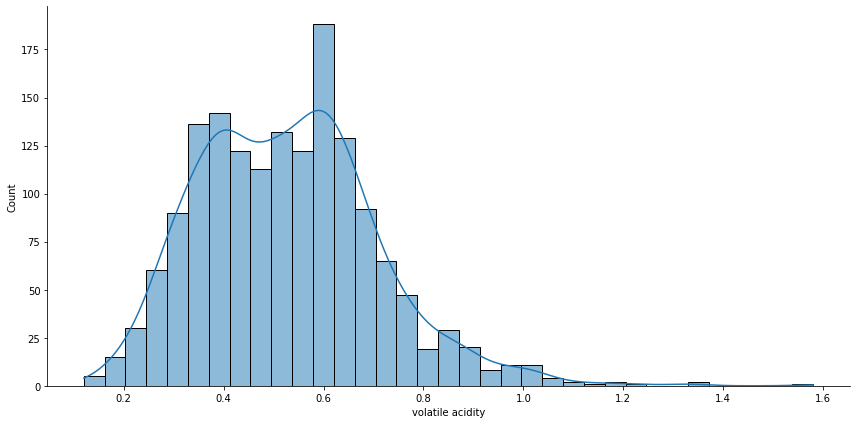

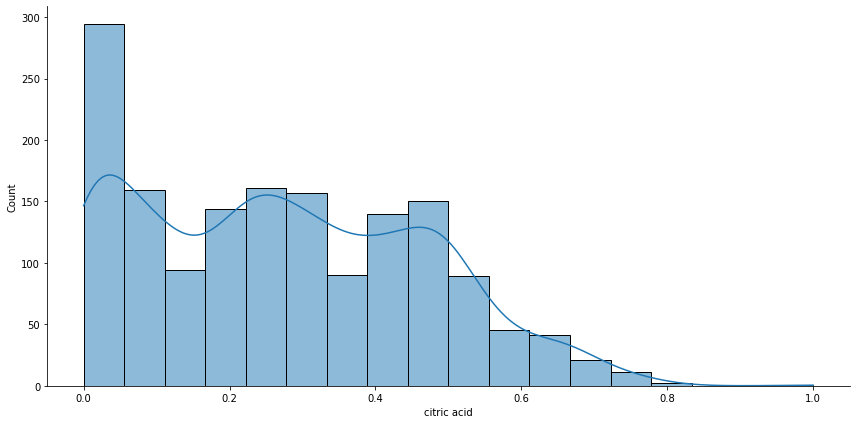

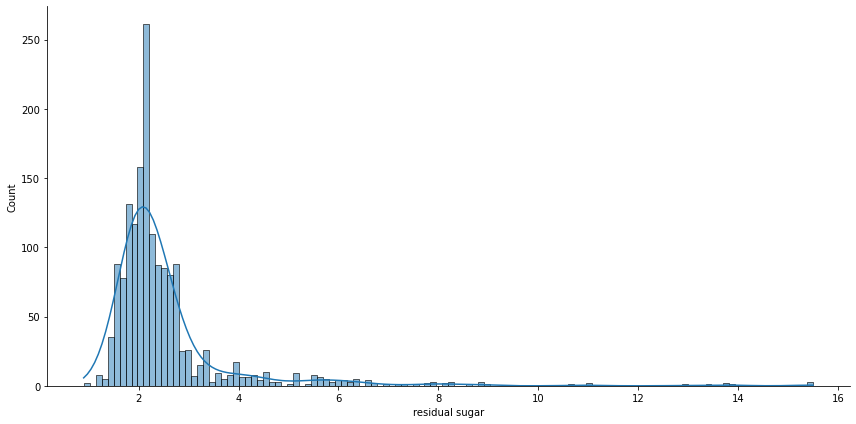

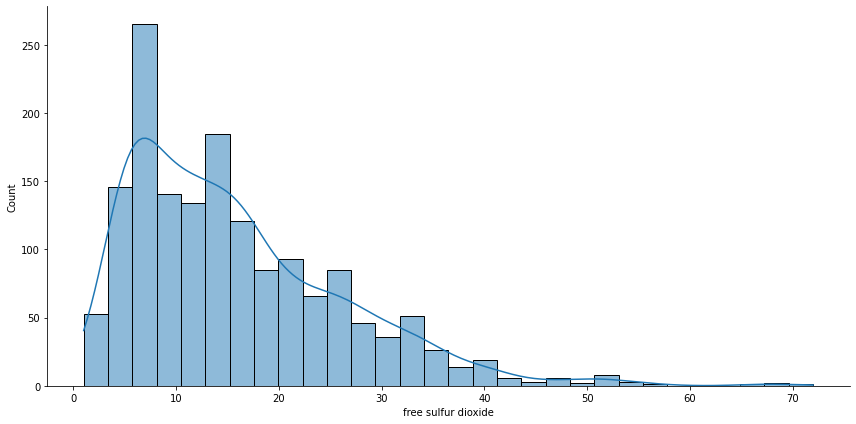

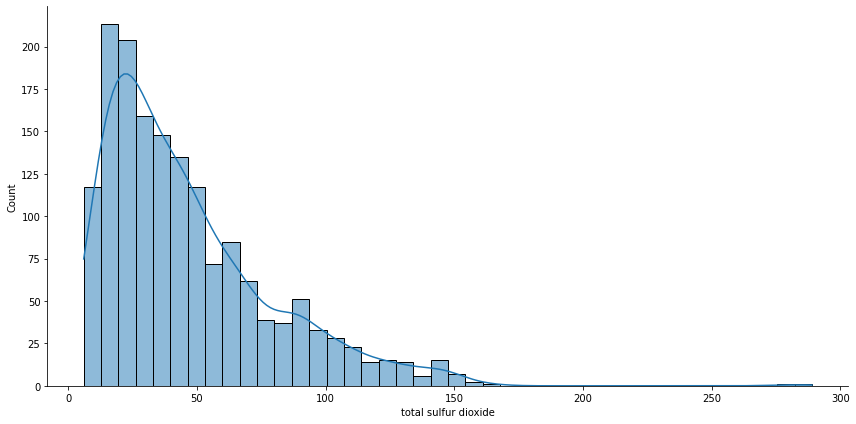

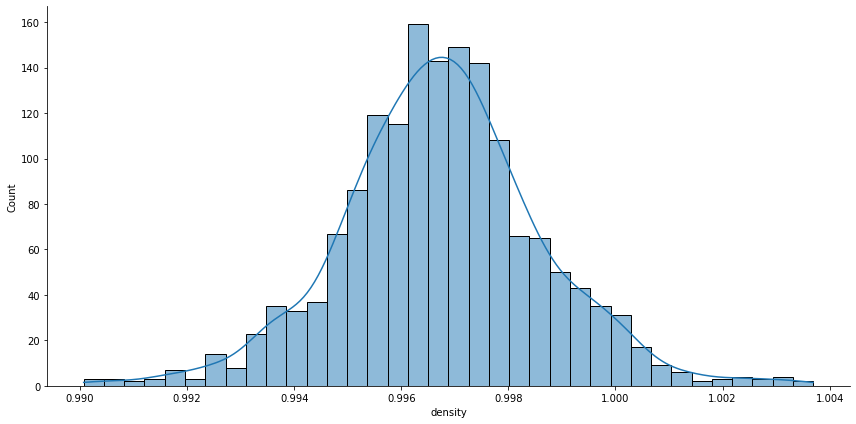

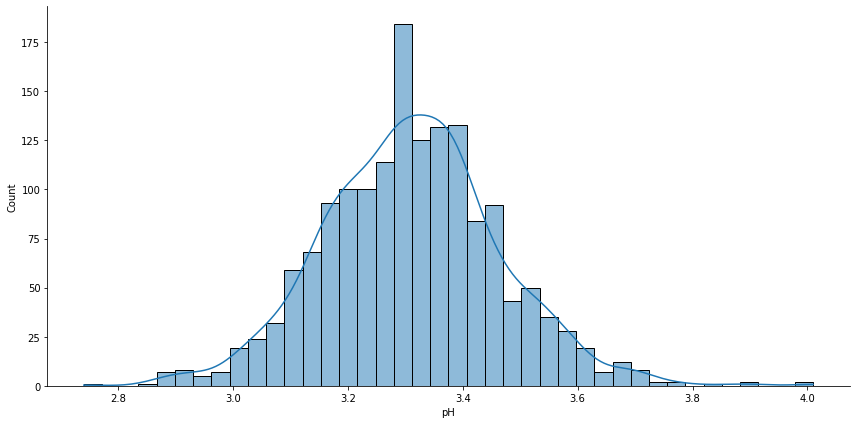

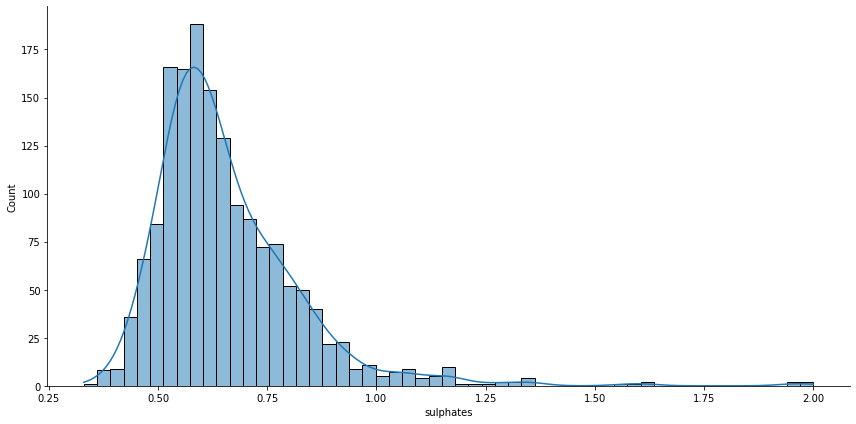

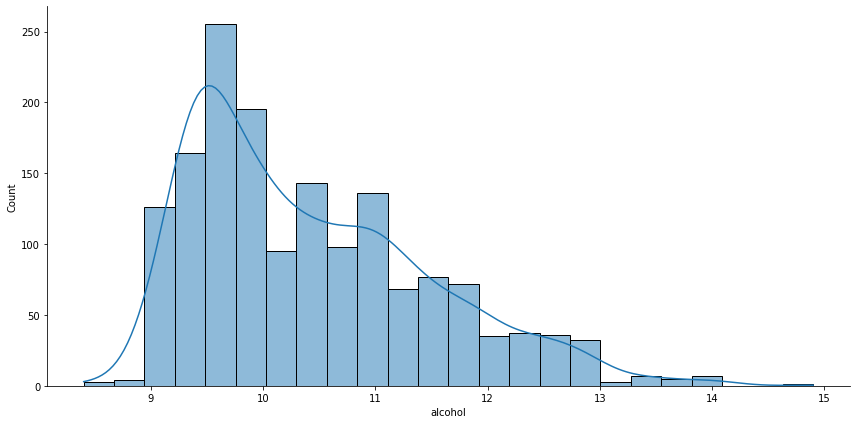

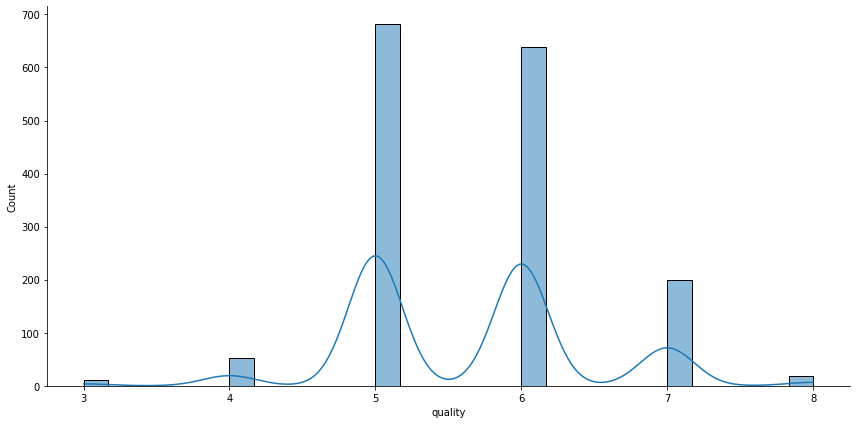

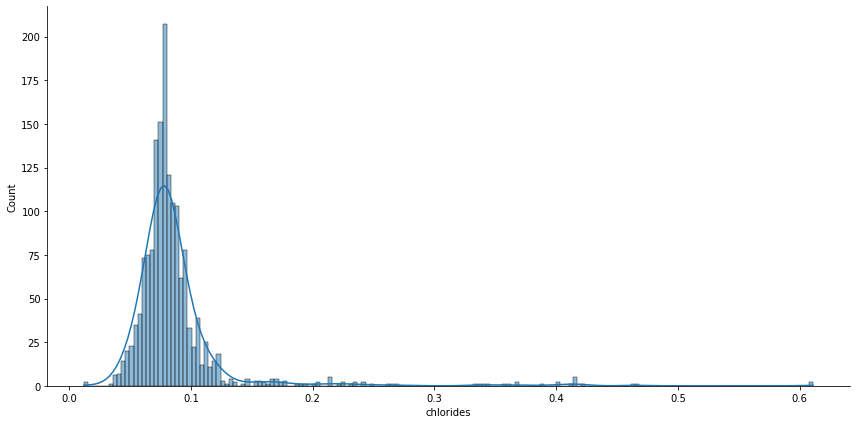

In [ ]:
# Checking the distrubution of variables

# fig, ax = plt.subplots(figsize=(10,10))
sb.displot(data, x = 'fixed acidity', kde=True, height=6, aspect=2)
sb.displot(data, x = 'volatile acidity', kde=True, height=6, aspect=2)
sb.displot(data, x = 'citric acid', kde=True, height=6, aspect=2)
sb.displot(data, x = 'residual sugar', kde=True, height=6, aspect=2)
sb.displot(data, x = 'free sulfur dioxide', kde=True, height=6, aspect=2)
sb.displot(data, x = 'total sulfur dioxide', kde=True, height=6, aspect=2)
sb.displot(data, x = 'density', kde=True, height=6, aspect=2)
sb.displot(data, x = 'pH', kde=True, height=6, aspect=2)
sb.displot(data, x = 'sulphates', kde=True, height=6, aspect=2)
sb.displot(data, x = 'alcohol', kde=True, height=6, aspect=2)
sb.displot(data, x = 'quality', kde=True, height=6, aspect=2)
sb.displot(data, x = 'chlorides', kde=True, height=6, aspect=2)


In [ ]:
# Finding Skewness of the variables

for column in data.columns:
  if data.dtypes[column] != np.object:
    print(column ,' : ' , skew(data[column], axis=0, bias=True, nan_policy='omit'))

fixed acidity  :  0.9818292953262073
volatile acidity  :  0.6709623963499574
citric acid  :  0.3180385895475358
residual sugar  :  4.536394788805638
chlorides  :  5.675016527504258
free sulfur dioxide  :  1.249393847434253
total sulfur dioxide  :  1.5141091878506638
density  :  0.07122077153539946
pH  :  0.19350175891005525
sulphates  :  2.426393455449087
alcohol  :  0.8600210646566755
quality  :  0.21759720553467285


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
# log transform chlorides column
chlorides_log = data[['chlorides']].applymap(lambda x: np.log(x))
chlorides_log.columns = 'log_' + chlorides_log.columns

In [ ]:
chlorides_log.skew()

log_chlorides    1.745215
dtype: float64

In [ ]:
# log transform sulphates column
sulphates_log = data[['sulphates']].applymap(lambda x: np.log(x))
sulphates_log.columns = 'log_' + sulphates_log.columns

In [ ]:
sulphates_log.skew()

log_sulphates    0.921867
dtype: float64

In [ ]:
df = pd.concat([data, chlorides_log,sulphates_log], axis=1)

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,log_chlorides,log_sulphates
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,-2.577022,-0.579818
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,-2.322788,-0.385662
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,-2.385967,-0.430783
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,-2.590267,-0.544727
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,-2.577022,-0.579818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,-2.407946,-0.544727
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,-2.780621,-0.274437
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,-2.577022,-0.287682
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,-2.590267,-0.342490


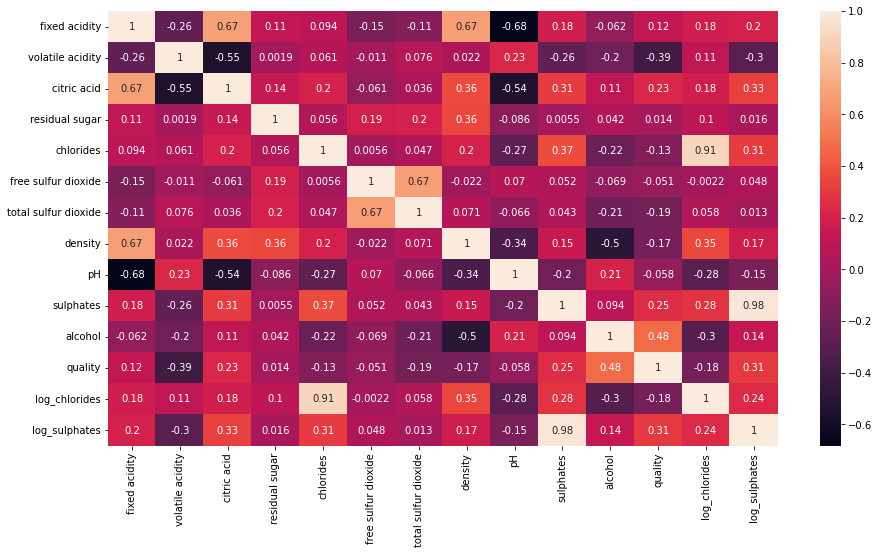

In [ ]:
# Finding correlation between variables
fig, ax = plt.subplots(figsize=(15,8))
sb.heatmap(df.corr(), annot=True)

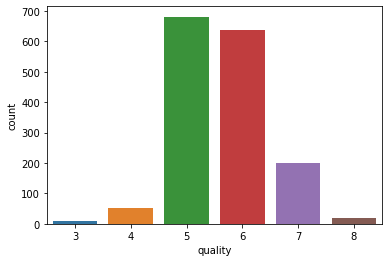

In [ ]:
# Count of each category of wine quality
sb.countplot(x="quality", data=df)

In [ ]:
# Preprocessing the data

df['quality'] = [1 if x>=7 else 0 for x in df['quality']]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,log_chlorides,log_sulphates
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,-2.577022,-0.579818
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,-2.322788,-0.385662
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,-2.385967,-0.430783
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,-2.590267,-0.544727
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,-2.577022,-0.579818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,-2.407946,-0.544727
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0,-2.780621,-0.274437
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,-2.577022,-0.287682
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,-2.590267,-0.342490


In [ ]:
# Developing Logistic Regression model
X = df.drop(labels='quality', axis=1).values
y = df['quality'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
logitmodel = LogisticRegression(solver='liblinear', random_state=0)


In [ ]:
logitmodel.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred = logitmodel.predict(X_test)

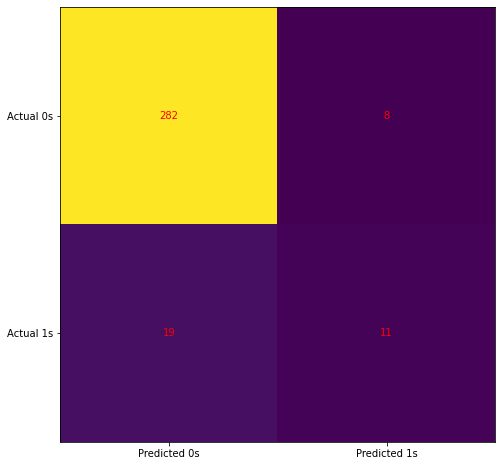

In [ ]:
# Finding test scores using confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       290
           1       0.58      0.37      0.45        30

    accuracy                           0.92       320
   macro avg       0.76      0.67      0.70       320
weighted avg       0.90      0.92      0.91       320



In [ ]:
# Accuracy_Score
logitmodel.score(X_test, y_test)

0.915625

In [ ]:
from sklearn import  metrics

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))

[[282   8]
 [ 19  11]]
